In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download all required NLTK resources
nltk.download('punkt')  # Instead of punkt_tab
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Eduardo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Eduardo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Eduardo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Eduardo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
df = pd.read_csv('book_reviews.csv')
df.shape

(11639, 6)

In [3]:
df.head()

,bookID,helpful,rating,reviewText,reviewerID,summary
0,B000F83SZQ,NaN,4,A beautiful in-depth character description mak...,A1RK2OCZDSGC6R,Review
1,B000F83SZQ,1.0,5,I'd never read any of the Amy Brewster mysteri...,A1FV0SX13TWVXQ,I really liked it.
2,B000F83SZQ,NaN,5,I enjoy vintage books and movies so I enjoyed ...,A1F6404F1VG29J,Nice vintage story
3,B000F83SZQ,1.0,4,Never heard of Amy Brewster. But I don't need ...,A3DE6XGZ2EPADS,Enjoyable reading and reminding the old times
4,B000F83SZQ,NaN,4,I enjoyed this one tho I'm not sure why it's c...,A2HSAKHC3IBRE6,Nice old fashioned story


In [4]:
df.helpful.value_counts()

helpful
1.000000    2554
0.500000     649
0.666667     325
0.750000     193
0.333333     161
            ... 
0.702703       1
0.961538       1
0.805556       1
0.954955       1
0.628571       1
Name: count, Length: 220, dtype: int64

In [5]:
df.dtypes

bookID         object
helpful       float64
rating          int64
reviewText     object
reviewerID     object
summary        object
dtype: object

In [6]:
df.isnull().sum()

bookID           0
helpful       6571
rating           0
reviewText       0
reviewerID       0
summary          2
dtype: int64

In [7]:
df.describe()

,helpful,rating
count,5068.000000,11639.000000
mean,0.808795,3.226652
std,0.236954,1.421247
min,0.016667,1.000000
25%,0.666667,2.000000
50%,1.000000,3.000000
75%,1.000000,4.000000
max,1.000000,5.000000


In [8]:
df.helpful.value_counts()

helpful
1.000000    2554
0.500000     649
0.666667     325
0.750000     193
0.333333     161
            ... 
0.702703       1
0.961538       1
0.805556       1
0.954955       1
0.628571       1
Name: count, Length: 220, dtype: int64

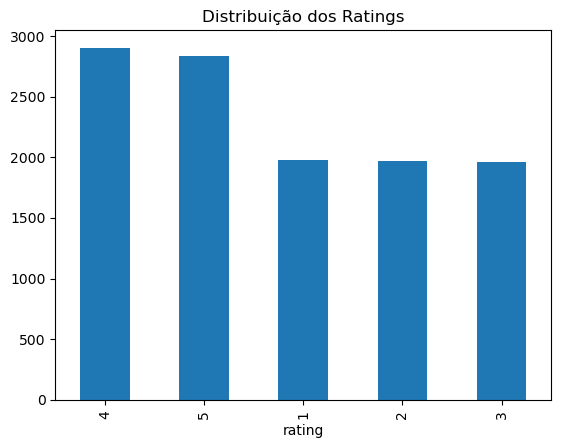

In [9]:
df['rating'].value_counts().plot(kind='bar')
plt.title('Distribuição dos Ratings')
plt.show()

In [10]:
exemplo = df.iloc[2].reviewText 
exemplo

"I enjoy vintage books and movies so I enjoyed reading this book.  The plot was unusual.  Don't think killing someone in self-defense but leaving the scene and the body without notifying the police or hitting someone in the jaw to knock them out would wash today.Still it was a good read for me."

In [11]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [12]:
from bs4 import BeautifulSoup

In [13]:
soup = BeautifulSoup(exemplo, 'html.parser') 
exemplo = soup.get_text() 
exemplo

"I enjoy vintage books and movies so I enjoyed reading this book.  The plot was unusual.  Don't think killing someone in self-defense but leaving the scene and the body without notifying the police or hitting someone in the jaw to knock them out would wash today.Still it was a good read for me."

In [14]:
# usar regex para limpar o texto 
import re 
exemplo = re.sub(r'<.*?','',exemplo)
exemplo = re.sub(r'\[[^]]*/]','',exemplo) 
exemplo = re.sub(r'\d+','',exemplo) 
exemplo = re.sub(r'[^a-zA-Z]',' ',exemplo)
exemplo

'I enjoy vintage books and movies so I enjoyed reading this book   The plot was unusual   Don t think killing someone in self defense but leaving the scene and the body without notifying the police or hitting someone in the jaw to knock them out would wash today Still it was a good read for me '

In [15]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [16]:
import nltk

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Eduardo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
exemplo = exemplo.split() 
exemplo = [word for word in exemplo if word.lower() not in set(stopwords.words('english'))]    
exemplo

['enjoy',
 'vintage',
 'books',
 'movies',
 'enjoyed',
 'reading',
 'book',
 'plot',
 'unusual',
 'think',
 'killing',
 'someone',
 'self',
 'defense',
 'leaving',
 'scene',
 'body',
 'without',
 'notifying',
 'police',
 'hitting',
 'someone',
 'jaw',
 'knock',
 'would',
 'wash',
 'today',
 'Still',
 'good',
 'read']

In [19]:
from nltk.stem import PorterStemmer 
stemmer = PorterStemmer()

In [20]:
exemplo_stemmer = [stemmer.stem(word) for word in exemplo] 
exemplo_stemmer = ' '.join(exemplo_stemmer) 
exemplo_stemmer

'enjoy vintag book movi enjoy read book plot unusu think kill someon self defens leav scene bodi without notifi polic hit someon jaw knock would wash today still good read'

In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Eduardo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

In [23]:
exemplo_lemmatize = [lemmatizer.lemmatize(word) for word in exemplo] 
exemplo_lemmatize = ' '.join(exemplo_lemmatize) 
exemplo_lemmatize

'enjoy vintage book movie enjoyed reading book plot unusual think killing someone self defense leaving scene body without notifying police hitting someone jaw knock would wash today Still good read'

In [24]:
# Remover HTML
def remove_html(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Remover pontuação
def remove_ponctuation(text):
    text2=re.sub(r'\[[^]]*\]','',text)
    return text2

# Remover caracteres especiais
def remove_specialChars(text):
    text2 = re.sub(r'[^a-zA-Z]', ' ', text)
    return text2

# Remover stopwords
def remove_stopwords_and_lemmatazion(text):
    # Initialize components outside the loop for better performance
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    # Process text
    text = text.lower()
    # Split text into words using basic split() instead of word_tokenize
    words = text.split()
    
    # Filter and lemmatize words
    final_text = []
    for word in words:
        if word not in stop_words:
            word = lemmatizer.lemmatize(word)
            final_text.append(word)
    
    return " ".join(final_text)

# Total 
def cleaning(text):
    text = remove_html(text)  # Add parentheses to call the function
    text = remove_ponctuation(text)
    text = remove_specialChars(text)
    text = remove_stopwords_and_lemmatazion(text)
    return text 

## Modelo Previsão da classificação apartir de uma review

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import RandomForestRegressor  # From your titanic examples
from sklearn.svm import SVR  # Since you've used SVM before

In [26]:
import nltk
# Apply cleaning function to all reviews

vectorizer = TfidfVectorizer(max_features=5000)

df['cleaned_review'] = df['reviewText'].apply(lambda x: cleaning(x))

X = vectorizer.fit_transform(df['cleaned_review'])
y = (df['rating'])

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_23312\817015838.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [28]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5064432989690721

Classification Report:
               precision    recall  f1-score   support

           1       0.54      0.59      0.56       375
           2       0.46      0.36      0.40       415
           3       0.38      0.30      0.33       376
           4       0.46      0.54      0.50       568
           5       0.61      0.66      0.63       594

    accuracy                           0.51      2328
   macro avg       0.49      0.49      0.49      2328
weighted avg       0.50      0.51      0.50      2328



In [41]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)
print("Cross-validation scores:", score)
print("Mean CV score:", score.mean())

Cross-validation scores: [0.48684917 0.5        0.50912997 0.52255639 0.48281418]
Mean CV score: 0.5002699410131033


In [42]:
from sklearn.svm import SVC

clf_svm = SVC()
modelo = clf_svm.fit(X_train, y_train)

print("\nTraining Score:")
print(modelo.score(X_train, y_train))

y_pred = modelo.predict(X_test)


Training Score:
0.9569326602942756


In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

def evaluate(reais, previstos):
    _accuracy = accuracy_score(reais, previstos)
    _precision = precision_score(reais, previstos, average='weighted')
    _recall = recall_score(reais, previstos, average='weighted')
    _f1 = f1_score(reais, previstos, average='weighted')
    return round(_accuracy,2), round(_precision,2), round(_recall,2), round(_f1,5)

def print_evaluate(model_name, reais, previstos):
    accuracy, precision, recall, f1 = evaluate(reais, previstos)
    print('__________________________________')
    print('Model:', model_name)
    print('Accuracy:', accuracy)
    print('Precision:', precision) 
    print('Recall:', recall)
    print('F1:', f1)
    print('__________________________________')

In [44]:
from sklearn.model_selection import GridSearchCV

parameters_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(
    SVC(),
    parameters_svm,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)

Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.5012365281734357


In [37]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier with parameters to control overfitting
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Fit model
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Evaluate
print_evaluate("Random Forest", y_test, rf_pred)

__________________________________
Model: Random Forest
Accuracy: 0.38
Precision: 0.48
Recall: 0.38
F1: 0.32297
__________________________________


__________________________________
Model: SVM (Best Parameters)
Accuracy: 0.51
Precision: 0.51
Recall: 0.51
F1: 0.50469
__________________________________


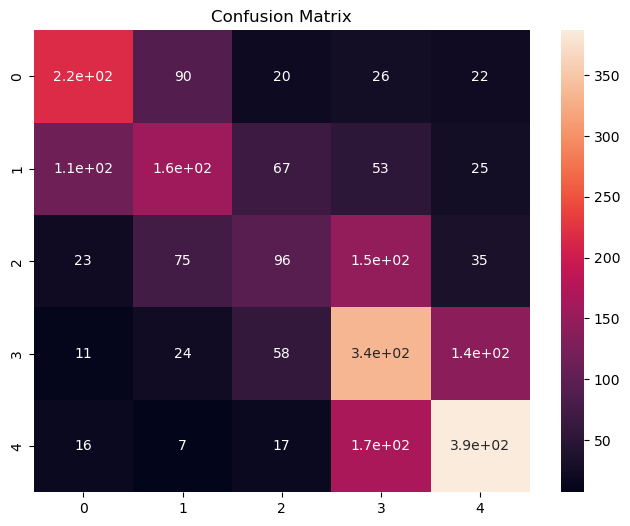

In [45]:
best_model = SVC(**grid.best_params_)
best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)
print_evaluate("SVM (Best Parameters)", y_test, y_pred_best)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=[8,6])
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.show()

In [46]:
parameters_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    parameters_rf,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

grid_rf.fit(X_train, y_train)

print("Best parameters:", grid_rf.best_params_)
print("Best cross-validation score:", grid_rf.best_score_)

best_rf = RandomForestClassifier(**grid_rf.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

rf_pred_best = best_rf.predict(X_test)
print_evaluate("RF (Best Parameters)", y_test, rf_pred_best)

Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.46053130295257355
__________________________________
Model: RF (Best Parameters)
Accuracy: 0.47
Precision: 0.46
Recall: 0.47
F1: 0.4434
__________________________________


In [ ]:
parameters_svm_new = {
    'C': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced', None]
}

grid_svm = GridSearchCV(
    SVC(random_state=42),
    parameters_svm_new,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

grid_svm.fit(X_train, y_train)

In [ ]:
def evaluate_model(model, X, y, model_name):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
    print(f"{model_name} CV Scores:", scores)
    print(f"{model_name} Mean CV Score: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

evaluate_model(best_rf, X_train, y_train, "Random Forest")
evaluate_model(grid_svm.best_estimator_, X_train, y_train, "SVM")

## modelo para prever quão útil é uma review

In [ ]:
## Modelo Previsão da utilidade de uma review

# Prepare data for helpful prediction
# Convert helpful column to binary classification (1 if helpful > 0.5, 0 otherwise)
df['helpful_binary'] = df['helpful'].apply(lambda x: 1 if x > 0.5 else 0)

# Use same vectorized text features as before
X = vectorizer.transform(df['cleaned_review'])
y_helpful = df['helpful_binary']

# Split data
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X, y_helpful, test_size=0.2, random_state=42
)

In [ ]:
# Try Random Forest first (like you did in rating prediction)
rf_helpful = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Fit model
rf_helpful.fit(X_train_h, y_train_h)

# Make predictions
rf_helpful_pred = rf_helpful.predict(X_test_h)

# Evaluate
print_evaluate("Random Forest - Helpful Prediction", y_test_h, rf_helpful_pred)

In [ ]:
# Grid search for Random Forest (following your pattern)
parameters_rf_helpful = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search
grid_rf_helpful = GridSearchCV(
    RandomForestClassifier(random_state=42),
    parameters_rf_helpful,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Fit grid search
grid_rf_helpful.fit(X_train_h, y_train_h)

print("Best parameters:", grid_rf_helpful.best_params_)
print("Best cross-validation score:", grid_rf_helpful.best_score_)

In [ ]:
# Try SVM with balanced class weights (like you did before)
parameters_svm_helpful = {
    'C': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced', None]
}

# Grid search
grid_svm_helpful = GridSearchCV(
    SVC(random_state=42),
    parameters_svm_helpful,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Fit grid search
grid_svm_helpful.fit(X_train_h, y_train_h)

# Print results
print("Best parameters:", grid_svm_helpful.best_params_)
print("Best cross-validation score:", grid_svm_helpful.best_score_)

In [ ]:
# Compare models using cross-validation (like you did before)
def evaluate_helpful_models():
    # Evaluate Random Forest
    evaluate_model(grid_rf_helpful.best_estimator_, X_train_h, y_train_h, 
                  "Random Forest - Helpful")
    
    # Evaluate SVM
    evaluate_model(grid_svm_helpful.best_estimator_, X_train_h, y_train_h, 
                  "SVM - Helpful")

evaluate_helpful_models()

In [ ]:
# Visualize confusion matrix for best model
best_helpful_pred = grid_rf_helpful.best_estimator_.predict(X_test_h)

plt.figure(figsize=[8,6])
cm_helpful = confusion_matrix(y_test_h, best_helpful_pred)
sns.heatmap(cm_helpful, annot=True)
plt.title('Confusion Matrix - Helpful Reviews Prediction')
plt.show()